In [2]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [3]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered=Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream=True).raw)

In [5]:
original.show()

In [6]:
tampered.show()

In [7]:
print("Original Image Format: ", original.format)
print("Tampered Image Format: ",tampered.format)

Original Image Format:  JPEG
Tampered Image Format:  PNG


In [8]:
print("Original image size:", original.size)
print("Tampered image size:", tampered.size)

Original image size: (1200, 800)
Tampered image size: (282, 179)


In [10]:
original=original.resize((250,160))
original.save("/Users/moham/PanCardTampering/Image/original.png")
tampered=tampered.resize((250,160))
tampered.save("/Users/moham/PanCardTampering/Image/tampered.png")
print(original.size)
print(tampered.size)

(250, 160)
(250, 160)


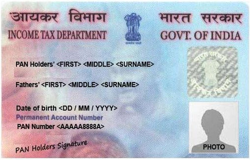

In [11]:
original

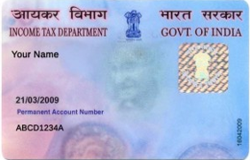

In [12]:
tampered

In [13]:
original=cv2.imread('/Users/moham/PanCardTampering/Image/original.png')
tampered=cv2.imread('/Users/moham/PanCardTampering/Image/tampered.png')

In [14]:
original_gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

In [17]:
original_gray

array([[254, 254, 253, ..., 253, 253, 254],
       [254, 251, 249, ..., 248, 249, 252],
       [253, 249, 252, ..., 249, 247, 251],
       ...,
       [249, 229, 217, ..., 190, 200, 238],
       [251, 248, 246, ..., 238, 241, 247],
       [253, 254, 253, ..., 255, 254, 253]], dtype=uint8)

In [18]:
tampered_gray

array([[254, 254, 254, ..., 252, 252, 254],
       [254, 254, 254, ..., 251, 251, 253],
       [254, 254, 250, ..., 238, 252, 252],
       ...,
       [253, 255, 250, ..., 236, 251, 252],
       [254, 253, 253, ..., 248, 253, 253],
       [255, 254, 254, ..., 253, 253, 250]], dtype=uint8)

In [20]:
(score,difference)=structural_similarity(original_gray,tampered_gray,full=True)

In [23]:
difference=(difference*255).astype("uint8") # based on the image coordinates above to normalise it 

In [24]:
print("Structural SImilarity Index:{}".format(score))

Structural SImilarity Index:0.31686135690489126


In [29]:
print(f"Structural Similarity Index : { format(score)}")

Structural Similarity Index : 0.31686135690489126


In [30]:
threshold= cv2.threshold(difference,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [32]:
contours=cv2.findContours(threshold.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [33]:
contours=imutils.grab_contours(contours)

In [36]:
for c in contours:
    (x,y,w,h)=cv2.boundingRect(c)#(x,y)- top left corner #calculates rect
    cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2) #(0,0,255)- BGR format of color (x+w,y+h)-bottom right corner 
    #last argument 2 is thickness of the rectangle # rectangle function draws the rectangle
    cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

In [37]:
#visualise the o/p image

Orginal Image


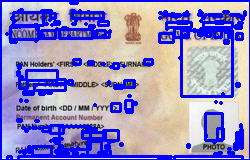

In [38]:
print("Orginal Image")
Image.fromarray(original)

Tampered Image


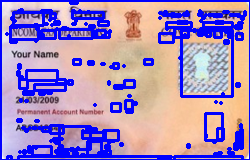

In [39]:
print("Tampered Image")
Image.fromarray(tampered)

Difference image


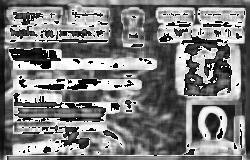

In [42]:
print("Difference image")
Image.fromarray(difference) # only calculates the difference between the images #Black portion calculates the differences

Threshold Image


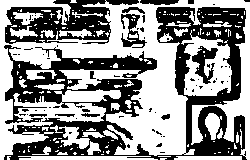

In [43]:
print("Threshold Image")
Image.fromarray(threshold)